# Multiple regression analysis in SQL with 3 independent variables
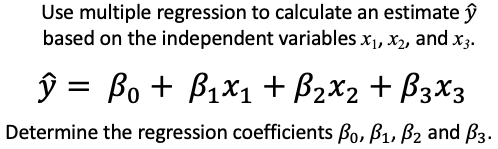

In [ ]:
import csv
import numpy as np
import pandas as pd
from pandas import DataFrame

## Read the values

In [ ]:
df = pd.read_csv('ThreeIndependents.csv')
values = list(df.itertuples(index=False, name=None))

df

## Regression coefficients using `sklearn`

In [ ]:
X1 = df.x1.to_numpy()
X2 = df.x2.to_numpy()
X3 = df.x3.to_numpy()

Xs = np.array([X1, X2, X3]).T
Y  = df.y.to_numpy()

In [ ]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()
linear_regression.fit(X=Xs, y=Y)

β0 = linear_regression.intercept_
β1 = linear_regression.coef_[0]
β2 = linear_regression.coef_[1]
β3 = linear_regression.coef_[2]

DataFrame( { 'β0': [β0], 'β1': [β1], 'β2': [β2], 'β3': β3 } )

In [ ]:
Betas = np.array([β1, β2, β3])

Yhat = []

for x in Xs:
    Yhat.append(x@Betas + β0)

In [ ]:
Errors = Y - Yhat
table = []

for i in range(len(Y)):
    pct = abs(100*Errors[i]/Y[i])
    row = np.concatenate([Xs[i], [Y[i], Yhat[i], Errors[i], pct]])
    
    table.append(row)

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format

df = DataFrame(table,
               columns = ['x1', 'x2', 'x3', 'actual y', 
                          'est. y', 'error', '% error']
)

display(df)
print(f'correlation coefficient = {np.corrcoef(Y, Yhat)[0, 1]:.2f}')